# Sentiment Analysis for ICT550 - Principle of Data Management

### Source: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews

In [1]:
pwd

'C:\\Users\\User'

In [2]:
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\User\\McDonald.csv',encoding='latin-1')

In [ ]:
print (df.columns.values)

In [ ]:
df .describe()

In [ ]:
# Determine the data types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

 

# Print the numerical and categorical columns
print("Numerical Columns:")

print (numerical_cols)

print("\nCategorical Columns:")

print (categorical_cols)

In [ ]:
df.astype('object').describe()

In [ ]:
pip install pandas-profiling

In [ ]:
import ydata_profiling

In [4]:
# Check data types
print("Data Types:")
print(df.dtypes)

Data Types:
reviewer_id        int64
store_name        object
category          object
store_address     object
latitude         float64
longitude        float64
rating_count      object
review_time       object
review            object
rating            object
dtype: object


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64


In [6]:
df['rating'] = df['rating'].str.replace('star', '')
df['rating'] = df['rating'].str.replace('stars', '')
df['rating'] = df['rating'].str.replace('s', '')

In [7]:
rate = df["rating"]
rate.head()

0    1 
1    4 
2    1 
3    5 
4    1 
Name: rating, dtype: object

In [8]:
df['rating'] = df['rating'].astype(int)

In [9]:
def check_value_ranges(df):
    invalid_rating = df[(df['rating']<1) | (df['rating']>5)]
    return invalid_rating

invalid_rating = check_value_ranges(df)
print(invalid_rating)

Empty DataFrame
Columns: [reviewer_id, store_name, category, store_address, latitude , longitude, rating_count, review_time, review, rating]
Index: []


In [10]:
# Determine the data types
numerical_cols = df.select_dtypes(include=['int', 'float']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Print the numerical and categorical columns
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['reviewer_id', 'latitude ', 'longitude', 'rating'], dtype='object')

Categorical Columns:
Index(['store_name', 'category', 'store_address', 'rating_count',
       'review_time', 'review'],
      dtype='object')


In [11]:
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [12]:
df.rename(columns = {'latitude ':'latitude'}, inplace = True)

In [13]:
print(df.columns)

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')


In [14]:
# Fill missing values in the ‘latitude’ and 'longtitude' column with a default value, which is '0'
df['latitude'].fillna('0', inplace=True)
df['longitude'].fillna('0', inplace=True)

In [15]:
df.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [16]:
def smooth_data(df,window=3):
    smoothed_data = df['rating'].rolling(window=window, min_periods=1).mean()
    return smoothed_data

df['smoothed_rating']= smooth_data(df)
print(df['smoothed_rating'])

0        1.000000
1        2.500000
2        2.000000
3        3.333333
4        2.333333
           ...   
33391    3.333333
33392    3.666667
33393    3.333333
33394    4.666667
33395    4.666667
Name: smoothed_rating, Length: 33396, dtype: float64


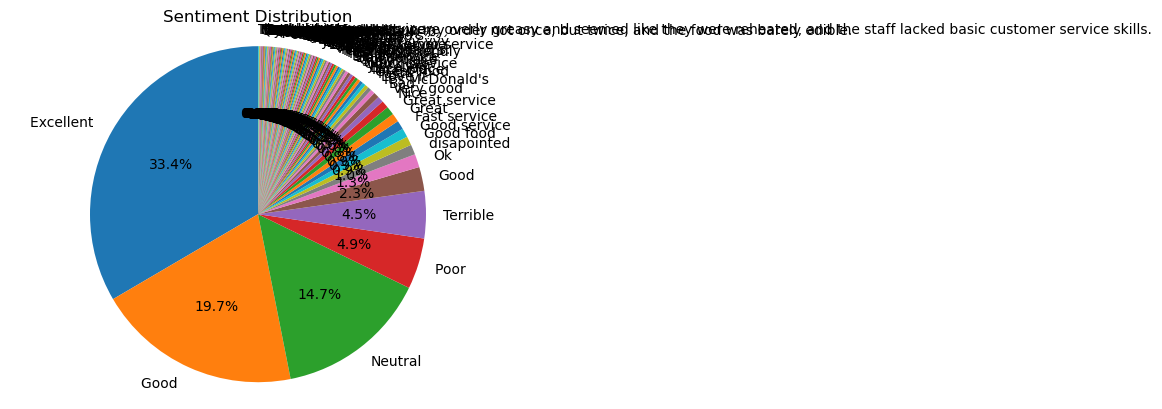

In [20]:
sentiment_counts = df['review'].value_counts()[:100]
labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Sentiment Distribution')

plt.show()

In [24]:
df['Polarity Rating'] = df['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))

In [26]:
df_Positive = df[df['Polarity Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity Rating'] == 'Neutral']
df_Negative = df[df['Polarity Rating'] == 'Negative']

In [28]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

In [29]:
def get_text_processing(text):
    stpword = stopwords .words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [30]:
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,smoothed_rating,Polarity Rating
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,2.500000,Positive
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,3.333333,Positive
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4,2.000000,Positive
16,17,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,The line wS extremely big and was moving very ...,4,2.333333,Positive
19,20,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",7 months ago,The staff seems to always be different which m...,4,2.000000,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
27926,27927,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,567",a year ago,Food was cold. Cheese wasn't melted on burger....,1,2.333333,Negative
23166,23167,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,566",7 years ago,I work at Ponderosa Steakhouse next door to th...,1,2.666667,Negative
14941,14942,McDonald's,Fast food restaurant,"111 Madison St, Oak Park, IL 60302, United States",41.879656,-87.777913,"1,454",5 years ago,"Sandwich Lukewarm,clients are loud and childre...",1,2.333333,Negative
7761,7762,McDonald's,Fast food restaurant,"11382 US-441, Orlando, FL 32837, United States",28.399986,-81.405103,"1,861",a month ago,As we walk in a girl behind the counter identi...,1,1.000000,Negative


In [32]:
df['Polarity_Rating'] = df['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))

<Axes: xlabel='rating', ylabel='count'>

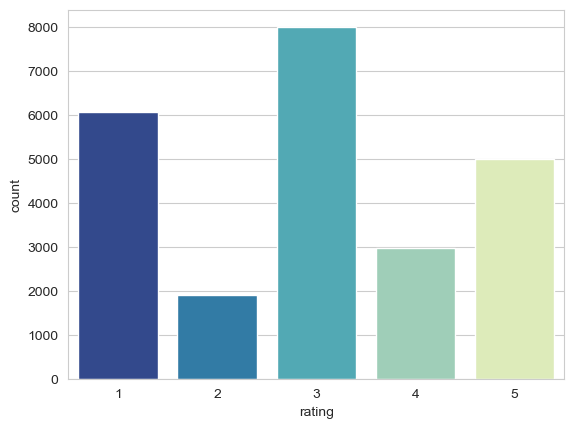

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='rating', data=df, palette='YlGnBu_r')

<Axes: xlabel='Polarity_Rating', ylabel='count'>

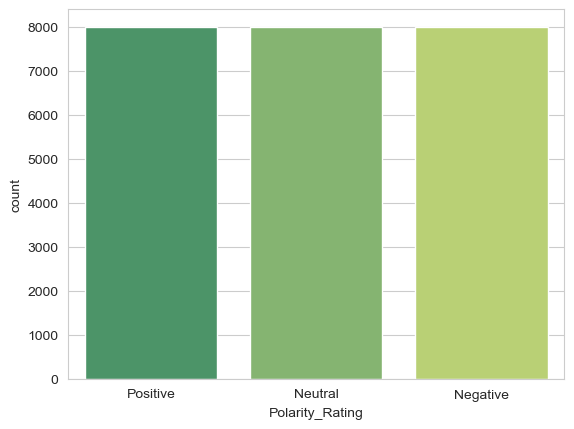

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

In [38]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(["Polarity_Rating"], axis=1, inplace=True)
df = pd.concat([df, one_hot], axis=1)
df. head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,smoothed_rating,Polarity Rating,Negative,Neutral,Positive
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,2.500000,Positive,0,0,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,3.333333,Positive,0,0,1
9,10,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"I'm not really a huge fan of fast food, but I ...",4,2.000000,Positive,0,0,1
16,17,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a year ago,The line wS extremely big and was moving very ...,4,2.333333,Positive,0,0,1
19,20,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",7 months ago,The staff seems to always be different which m...,4,2.000000,Positive,0,0,1


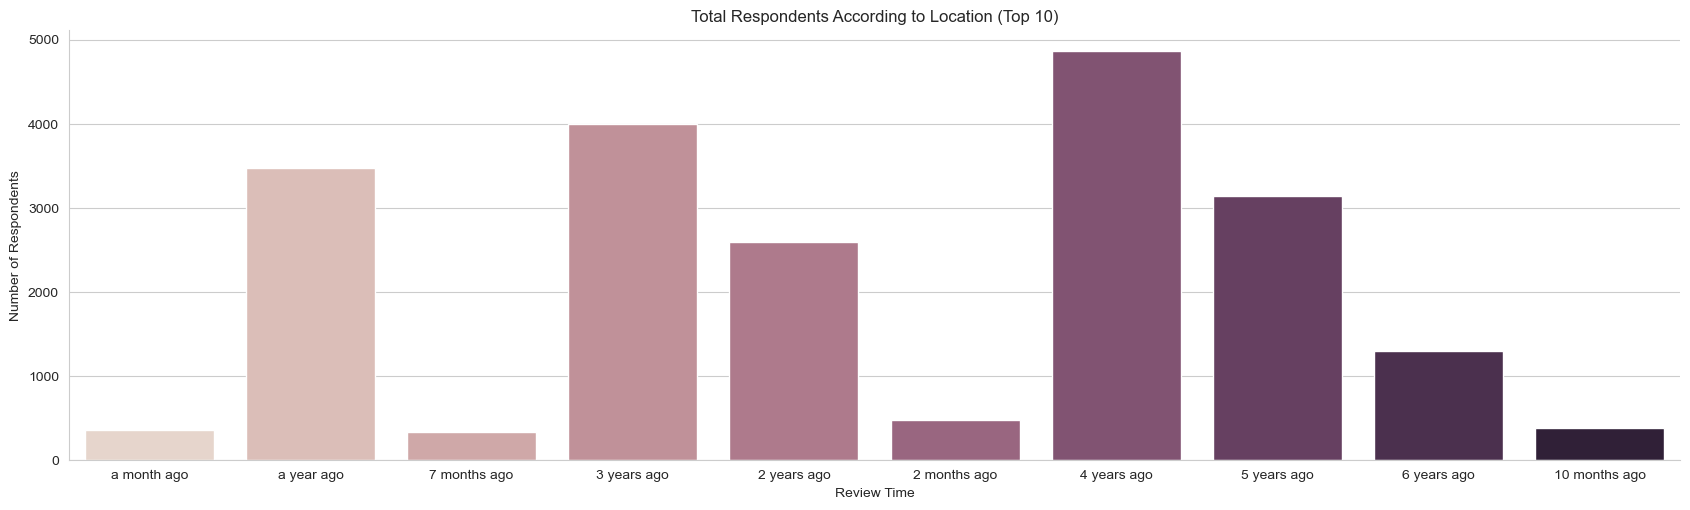

In [45]:
# Determine the frequency of each category
category_counts = df['review_time'].value_counts()

# Select the top 10 most frequent categories
top_categories = category_counts.nlargest (10) . index

# Filter the DataFrame based on selected categories
filtered_df = df[df['review_time'].isin(top_categories)]

# Plot the filtered DataFrame

sns.catplot(x="review_time", kind="count", palette="ch:.100", data=filtered_df, height=5, aspect=3.4)
plt.title("Total Respondents According to Location (Top 10)")

plt.xlabel("Review Time")

plt.ylabel("Number of Respondents")

plt. show()